In [1]:
# modules import
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psyplot.project as psy
import xesmf as xe
import scipy.io
import datetime
import seaborn as sns

In [2]:
# Open model data
general_path = '/Users/jcaillet/Documents/nemo/'
netCDF_file = general_path + 'AMUXL025/ANALYSES/COMPLEMENT/melt_sensitivity.nc'
netCDF_file1 = general_path + 'AMUXL025/ANALYSES/COMPLEMENT/melt_sensitivity_08.nc'
Melt = xr.open_mfdataset(netCDF_file)
Melt1 = xr.open_mfdataset(netCDF_file1)
# Melt mean
A = np.array([7,4,5,1,6,2,3])
Melt_select_mean = Melt.where(Melt.time.dt.year>2011).mean('time')
Melt_select_mean1 = Melt1.where(Melt1.time.dt.year>2011).mean('time')
Melt_select_mean_tot = xr.merge([Melt_select_mean, Melt_select_mean1])
Melt_select_mean_tot['iceshelf'] = A
Melt_select_mean_tot = Melt_select_mean_tot.sortby('iceshelf')
# Melt std
Melt_select_std = Melt.where(Melt.time.dt.year>2011).std('time')
Melt_select_std1 = Melt1.where(Melt1.time.dt.year>2011).std('time')
Melt_select_std_tot = xr.merge([Melt_select_std, Melt_select_std1])
Melt_select_std_tot['iceshelf'] = A
Melt_select_std_tot = Melt_select_std_tot.sortby('iceshelf')

## observations
obs = '/Users/jcaillet/Documents/nemo/DATA_OBSERVATIONS/Basal_melting/Data_melting_period.pkl'
obs = pd.read_pickle(obs)
obs_select = obs.drop(3)
obs_select = obs_select.drop(1)

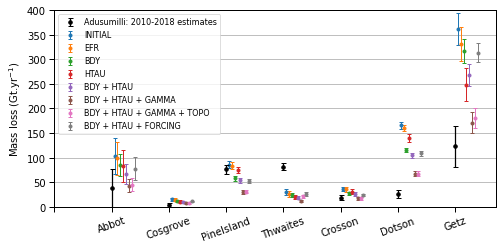

In [3]:
sns.set_context('paper')

#figure
fig40 = plt.figure(figsize = (7.08, 3.56))    
plt.errorbar(obs_select['location']-1, obs_select['melt_Adusumilli 2010-2018'], yerr = list(obs_select['error_Adusumilli 2010-2018']), color = 'black', fmt = 'o', ms = 3.5, elinewidth = 1.25, capsize = 2.5, label = 'Adusumilli: 2010-2018 estimates', zorder=9)
plt.errorbar(Melt_select_mean_tot.iceshelf+0.05, Melt_select_mean_tot.melt[:, 0], yerr = Melt_select_std_tot.melt[:, 0], fmt = 'o', ms = 3, elinewidth = 1, capsize = 2, label = 'INITIAL')
plt.errorbar(Melt_select_mean_tot.iceshelf+0.1, Melt_select_mean_tot.melt[:, 1], yerr = Melt_select_std_tot.melt[:, 1], fmt = 'o', ms = 3, elinewidth = 1, capsize = 2, label = 'EFR')
plt.errorbar(Melt_select_mean_tot.iceshelf+0.15, Melt_select_mean_tot.melt[:, 2], yerr = Melt_select_std_tot.melt[:, 2], fmt = 'o', ms = 3, elinewidth = 1, capsize = 2, label = 'BDY')
plt.errorbar(Melt_select_mean_tot.iceshelf+0.2, Melt_select_mean_tot.melt[:, 4], yerr = Melt_select_std_tot.melt[:, 4], fmt = 'o', ms = 3, elinewidth = 1, capsize = 2, label = 'HTAU')
plt.errorbar(Melt_select_mean_tot.iceshelf+0.25, Melt_select_mean_tot.melt[:, 3], yerr = Melt_select_std_tot.melt[:, 3], fmt = 'o', ms = 3, elinewidth = 1, capsize = 2, label = 'BDY + HTAU')
plt.errorbar(Melt_select_mean_tot.iceshelf+0.3, Melt_select_mean_tot.melt[:, 5], yerr = Melt_select_std_tot.melt[:, 5], fmt = 'o', ms = 3, elinewidth = 1, capsize = 2, label = 'BDY + HTAU + GAMMA')
plt.errorbar(Melt_select_mean_tot.iceshelf+0.35, Melt_select_mean_tot.melt[:, 6], yerr = Melt_select_std_tot.melt[:, 6], fmt = 'o', ms = 3, elinewidth = 1, capsize = 2, label = 'BDY + HTAU + GAMMA + TOPO')
plt.errorbar(Melt_select_mean_tot.iceshelf+0.4, Melt_select_mean_tot.melt[:, 7], yerr = Melt_select_std_tot.melt[:, 7], fmt = 'o', ms = 3, elinewidth = 1, capsize = 2, label = 'BDY + HTAU + FORCING')
plt.xticks(np.arange(8), ['', 'Abbot', 'Cosgrove', 'PineIsland', 'Thwaites', 'Crosson', 'Dotson', 'Getz'])
plt.xticks(fontsize=10, rotation=20)
plt.yticks(fontsize=10)
plt.legend(prop={"size":8})
plt.ylim(0,400)
plt.grid(True, axis='y')
plt.ylabel('Mass loss (Gt.yr$^{-1}$)', fontsize = 10)
plt.tight_layout()
fig40.savefig('/Users/jcaillet/Documents/nemo/AMUXL025/ANALYSES/RESULTS/melt_20122018.pdf')  